# Processing 2021 Census Employment income data

The data in this notebook is provided by Statistics Canada. Table 98-10-0066-01  Employment income groups by age and gender: Canada, provinces and territories, census metropolitan areas and census agglomerations with parts

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Employment income.csv', low_memory=False)
df.head()


,REF_DATE,GEO,DGUID,Age (11),Gender (3a),Employment income groups (21),Coordinate,Year (2):2020[1],Symbol,Year (2):2015[2],Symbol.1
0,2021,Canada,2021A000011124,Total - Age,Total - Gender,Total - Employment income,1.1.1.1,30336135.0,NaN,28642980.0,NaN
1,2021,Canada,2021A000011124,Total - Age,Total - Gender,Without employment income,1.1.1.2,9208520.0,NaN,8214290.0,NaN
2,2021,Canada,2021A000011124,Total - Age,Total - Gender,With employment income,1.1.1.3,21127615.0,NaN,20428685.0,NaN
3,2021,Canada,2021A000011124,Total - Age,Total - Gender,Percentage with employment income,1.1.1.4,69.6,NaN,71.3,NaN
4,2021,Canada,2021A000011124,Total - Age,Total - Gender,"Under $5,000 (including loss)",1.1.1.5,2951140.0,NaN,2655930.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   REF_DATE                       120582 non-null  int64  
 1   GEO                            120582 non-null  object 
 2   DGUID                          120582 non-null  object 
 3   Age (11)                       120582 non-null  object 
 4   Gender (3a)                    120582 non-null  object 
 5   Employment income groups (21)  120582 non-null  object 
 6   Coordinate                     120582 non-null  object 
 7   Year (2):2020[1]               120577 non-null  float64
 8   Symbol                         6 non-null       object 
 9   Year (2):2015[2]               120575 non-null  float64
 10  Symbol.1                       10 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.1+ MB


In [5]:
df.drop(columns=['DGUID','Coordinate','Symbol','Symbol.1'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   REF_DATE                       120582 non-null  int64  
 1   GEO                            120582 non-null  object 
 2   Age (11)                       120582 non-null  object 
 3   Gender (3a)                    120582 non-null  object 
 4   Employment income groups (21)  120582 non-null  object 
 5   Year (2):2020[1]               120577 non-null  float64
 6   Year (2):2015[2]               120575 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.4+ MB


In [7]:
ca = df[df.GEO=='Canada']

In [8]:
bc = df[df.GEO=='British Columbia']
print(bc.head())

       REF_DATE               GEO     Age (11)     Gender (3a)  \
97020      2021  British Columbia  Total - Age  Total - Gender   
97021      2021  British Columbia  Total - Age  Total - Gender   
97022      2021  British Columbia  Total - Age  Total - Gender   
97023      2021  British Columbia  Total - Age  Total - Gender   
97024      2021  British Columbia  Total - Age  Total - Gender   

           Employment income groups (21)  Year (2):2020[1]  Year (2):2015[2]  
97020          Total - Employment income         4200500.0         3870330.0  
97021          Without employment income         1314135.0         1095325.0  
97022             With employment income         2886365.0         2775005.0  
97023  Percentage with employment income              68.7              71.7  
97024      Under $5,000 (including loss)          397635.0          424390.0  


In [9]:

bc.rename(columns={'REF_DATE':'Year', 'GEO':'geo','Age (11)':'Age','Gender (3a)': 'Gender','Employment income groups (21)':'income groups','Year (2):2020[1]':'2020',
                  'Year (2):2015[2]':'2015'})
ca.rename(columns={'REF_DATE':'Year', 'GEO':'geo','Age (11)':'Age','Gender (3a)': 'Gender','Employment income groups (21)':'income groups','Year (2):2020[1]':'2020',
                  'Year (2):2015[2]':'2015'})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4508\781618111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.rename(columns={'REF_DATE':'Year', 'GEO':'geo','Age (11)':'Age','Gender (3a)': 'Gender','Employment income groups (21)':'income groups','Year (2):2020[1]':'2020',
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4508\781618111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca.rename(columns={'REF_DATE':'Year', 'GEO':'geo','Age (11)':'Age','Gender (3a)': 'Gender','Employment income groups (21)':'income groups','Year (2):2020[1]':'2020',


In [10]:
df.rename(columns={'REF_DATE':'Year', 'GEO':'geo','Age (11)':'Age','Gender (3a)': 'Gender','Employment income groups (21)':'income groups','Year (2):2020[1]':'2020',
                  'Year (2):2015[2]':'2015'},inplace=True)

In [11]:
ca.head()

,Year,geo,Age,Gender,income groups,2020,2015
0,2021,Canada,Total - Age,Total - Gender,Total - Employment income,30336135.0,28642980.0
1,2021,Canada,Total - Age,Total - Gender,Without employment income,9208520.0,8214290.0
2,2021,Canada,Total - Age,Total - Gender,With employment income,21127615.0,20428685.0
3,2021,Canada,Total - Age,Total - Gender,Percentage with employment income,69.6,71.3
4,2021,Canada,Total - Age,Total - Gender,"Under $5,000 (including loss)",2951140.0,2655930.0


In [12]:
print(ca.Age.unique())

['Total - Age' '15 to 24 years' '25 to 64 years' '25 to 54 years'
 '25 to 34 years' '35 to 44 years' '45 to 54 years' '55 to 64 years'
 '65 years and over' '65 to 74 years' '75 years and over']


In [13]:
ca.astype({'Age':'category','Gender':'category','income groups':'category'},copy=False).dtypes
bc.astype({'Age':'category','Gender':'category','income groups':'category'},copy=False).dtypes


Year                int64
geo                object
Age              category
Gender           category
income groups    category
2020              float64
2015              float64
dtype: object

Now we want to focus on each income level, and do a comparative analysis based on gender and age.

In [14]:
ca['income groups'].unique()

caIncomeLevel = ca[ca['income groups'].isin(['Under $5,000 (including loss)','$5,000 to $9,999',
       '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999',
       '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999',
       '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', '$100,000 and over'])]

caIncomeLevel.shape

(528, 7)

In [15]:
bcIncomeLevel = bc[bc['income groups'].isin(['Under $5,000 (including loss)','$5,000 to $9,999',
       '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999',
       '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999',
       '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', '$100,000 and over'])]

bcIncomeLevel.head()

,Year,geo,Age,Gender,income groups,2020,2015
97024,2021,British Columbia,Total - Age,Total - Gender,"Under $5,000 (including loss)",397635.0,424390.0
97025,2021,British Columbia,Total - Age,Total - Gender,"$5,000 to $9,999",234135.0,198500.0
97026,2021,British Columbia,Total - Age,Total - Gender,"$10,000 to $14,999",187825.0,189205.0
97027,2021,British Columbia,Total - Age,Total - Gender,"$15,000 to $19,999",151445.0,163920.0
97028,2021,British Columbia,Total - Age,Total - Gender,"$20,000 to $24,999",136585.0,150525.0


In [16]:
caIncomeLevel2020 = caIncomeLevel.pivot_table(values='2020',index=['Gender','Age'],columns=['income groups'])

In [17]:
Col_order = ['Under $5,000 (including loss)','$5,000 to $9,999',
       '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999',
       '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999',
       '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', '$100,000 and over']
caIncomeLevel2020 = caIncomeLevel2020.reindex(Col_order,axis=1)

caIncomeLevel2020.head()

income groups          Under $5,000 (including loss)  $5,000 to $9,999  \
Gender Age                                                               
Men+   15 to 24 years                       371385.0          275580.0   
       25 to 34 years                       145680.0          130560.0   
       25 to 54 years                       357105.0          292325.0   
       25 to 64 years                       571165.0          394375.0   
       35 to 44 years                       105830.0           84770.0   

income groups          $10,000 to $14,999  $15,000 to $19,999  \
Gender Age                                                      
Men+   15 to 24 years            200760.0            137535.0   
       25 to 34 years            119890.0            109595.0   
       25 to 54 years            260975.0            240525.0   
       25 to 64 years            348590.0            319140.0   
       35 to 44 years             74790.0             69920.0   

income groups          $20,000 to $24,999  $25,000 to $29,999  \
Gender Age                                                      
Men+   15 to 24 years            100270.0             79095.0   
       25 to 34 years            109780.0            112300.0   
       25 to 54 years            244140.0            247835.0   
       25 to 64 years            319785.0            322885.0   
       35 to 44 years             72395.0             72830.0   

income groups          $30,000 to $34,999  $35,000 to $39,999  \
Gender Age                                                      
Men+   15 to 24 years             63340.0             50535.0   
       25 to 34 years            118940.0            121820.0   
       25 to 54 years            270075.0            285400.0   
       25 to 64 years            351340.0            370435.0   
       35 to 44 years             81485.0             87565.0   

income groups          $40,000 to $44,999  $45,000 to $49,999  \
Gender Age                                                      
Men+   15 to 24 years             39210.0             29885.0   
       25 to 34 years            122575.0            119595.0   
       25 to 54 years            299110.0            302805.0   
       25 to 64 years            387775.0            391580.0   
       35 to 44 years             94290.0             97875.0   

income groups          $50,000 to $59,999  $60,000 to $69,999  \
Gender Age                                                      
Men+   15 to 24 years             39820.0             22380.0   
       25 to 34 years            222315.0            194880.0   
       25 to 54 years            591710.0            549400.0   
       25 to 64 years            760915.0            699910.0   
       35 to 44 years            196385.0            189155.0   

income groups          $70,000 to $79,999  $80,000 to $89,999  \
Gender Age                                                      
Men+   15 to 24 years             12335.0              6745.0   
       25 to 34 years            156935.0            117100.0   
       25 to 54 years            476965.0            407415.0   
       25 to 64 years            600660.0            513585.0   
       35 to 44 years            172280.0            153380.0   

income groups          $90,000 to $99,999  $100,000 and over  
Gender Age                                                    
Men+   15 to 24 years              3785.0             6880.0  
       25 to 34 years             82410.0           207030.0  
       25 to 54 years            332095.0          1192910.0  
       25 to 64 years            420635.0          1566040.0  
       35 to 44 years            129830.0           473075.0

In [18]:
bcIncomeLevel2020 = bcIncomeLevel.pivot_table(values='2020',index=['Gender','Age'],columns=['income groups'])

bcIncomeLevel2020 = bcIncomeLevel2020.reindex(Col_order,axis=1)

bcIncomeLevel2020.head()

income groups          Under $5,000 (including loss)  $5,000 to $9,999  \
Gender Age                                                               
Men+   15 to 24 years                        49495.0           33045.0   
       25 to 34 years                        20250.0           17915.0   
       25 to 54 years                        50130.0           39805.0   
       25 to 64 years                        77190.0           53775.0   
       35 to 44 years                        14800.0           11280.0   

income groups          $10,000 to $14,999  $15,000 to $19,999  \
Gender Age                                                      
Men+   15 to 24 years             24155.0             17050.0   
       25 to 34 years             16490.0             14940.0   
       25 to 54 years             35925.0             32045.0   
       25 to 64 years             47740.0             42125.0   
       35 to 44 years             10170.0              9195.0   

income groups          $20,000 to $24,999  $25,000 to $29,999  \
Gender Age                                                      
Men+   15 to 24 years             13315.0             10900.0   
       25 to 34 years             14790.0             15125.0   
       25 to 54 years             31850.0             32355.0   
       25 to 64 years             41190.0             41590.0   
       35 to 44 years              9140.0              9440.0   

income groups          $30,000 to $34,999  $35,000 to $39,999  \
Gender Age                                                      
Men+   15 to 24 years              9145.0              7255.0   
       25 to 34 years             15915.0             16390.0   
       25 to 54 years             34620.0             36140.0   
       25 to 64 years             44300.0             46115.0   
       35 to 44 years             10235.0             10700.0   

income groups          $40,000 to $44,999  $45,000 to $49,999  \
Gender Age                                                      
Men+   15 to 24 years              5565.0              4395.0   
       25 to 34 years             16780.0             16645.0   
       25 to 54 years             37800.0             39455.0   
       25 to 64 years             48085.0             50220.0   
       35 to 44 years             11415.0             12405.0   

income groups          $50,000 to $59,999  $60,000 to $69,999  \
Gender Age                                                      
Men+   15 to 24 years              5750.0              3320.0   
       25 to 34 years             31315.0             27885.0   
       25 to 54 years             78870.0             75995.0   
       25 to 64 years            100430.0             96520.0   
       35 to 44 years             25655.0             26055.0   

income groups          $70,000 to $79,999  $80,000 to $89,999  \
Gender Age                                                      
Men+   15 to 24 years              1985.0              1095.0   
       25 to 34 years             22765.0             17215.0   
       25 to 54 years             67700.0             57895.0   
       25 to 64 years             85460.0             73160.0   
       35 to 44 years             24470.0             21925.0   

income groups          $90,000 to $99,999  $100,000 and over  
Gender Age                                                    
Men+   15 to 24 years               685.0             1230.0  
       25 to 34 years             12440.0            32645.0  
       25 to 54 years             48115.0           172035.0  
       25 to 64 years             61130.0           224220.0  
       35 to 44 years             18670.0            69265.0

In [19]:
caIncomeLevel2020 = caIncomeLevel2020.drop(index= '25 to 54 years',level=1)
caIncomeLevel2020 = caIncomeLevel2020.drop(index= '25 to 64 years',level=1)

In [20]:
caIncomeLevel2020.head()

income groups          Under $5,000 (including loss)  $5,000 to $9,999  \
Gender Age                                                               
Men+   15 to 24 years                       371385.0          275580.0   
       25 to 34 years                       145680.0          130560.0   
       35 to 44 years                       105830.0           84770.0   
       45 to 54 years                       105595.0           76995.0   
       55 to 64 years                       214060.0          102055.0   

income groups          $10,000 to $14,999  $15,000 to $19,999  \
Gender Age                                                      
Men+   15 to 24 years            200760.0            137535.0   
       25 to 34 years            119890.0            109595.0   
       35 to 44 years             74790.0             69920.0   
       45 to 54 years             66295.0             61010.0   
       55 to 64 years             87615.0             78610.0   

income groups          $20,000 to $24,999  $25,000 to $29,999  \
Gender Age                                                      
Men+   15 to 24 years            100270.0             79095.0   
       25 to 34 years            109780.0            112300.0   
       35 to 44 years             72395.0             72830.0   
       45 to 54 years             61965.0             62710.0   
       55 to 64 years             75645.0             75050.0   

income groups          $30,000 to $34,999  $35,000 to $39,999  \
Gender Age                                                      
Men+   15 to 24 years             63340.0             50535.0   
       25 to 34 years            118940.0            121820.0   
       35 to 44 years             81485.0             87565.0   
       45 to 54 years             69650.0             76010.0   
       55 to 64 years             81265.0             85035.0   

income groups          $40,000 to $44,999  $45,000 to $49,999  \
Gender Age                                                      
Men+   15 to 24 years             39210.0             29885.0   
       25 to 34 years            122575.0            119595.0   
       35 to 44 years             94290.0             97875.0   
       45 to 54 years             82250.0             85340.0   
       55 to 64 years             88660.0             88770.0   

income groups          $50,000 to $59,999  $60,000 to $69,999  \
Gender Age                                                      
Men+   15 to 24 years             39820.0             22380.0   
       25 to 34 years            222315.0            194880.0   
       35 to 44 years            196385.0            189155.0   
       45 to 54 years            173010.0            165370.0   
       55 to 64 years            169210.0            150505.0   

income groups          $70,000 to $79,999  $80,000 to $89,999  \
Gender Age                                                      
Men+   15 to 24 years             12335.0              6745.0   
       25 to 34 years            156935.0            117100.0   
       35 to 44 years            172280.0            153380.0   
       45 to 54 years            147755.0            136925.0   
       55 to 64 years            123695.0            106170.0   

income groups          $90,000 to $99,999  $100,000 and over  
Gender Age                                                    
Men+   15 to 24 years              3785.0             6880.0  
       25 to 34 years             82410.0           207030.0  
       35 to 44 years            129830.0           473075.0  
       45 to 54 years            119855.0           512795.0  
       55 to 64 years             88540.0           373130.0

In [21]:
bcIncomeLevel2020 = bcIncomeLevel2020.drop(index= '25 to 54 years',level=1)
bcIncomeLevel2020 = bcIncomeLevel2020.drop(index= '25 to 64 years',level=1)

## What is the income level of most people in each age group?

In [22]:
caIncomeLevel2020['Max'] = caIncomeLevel2020.idxmax(axis=1)

In [23]:
caIncomeLevel2020.head()

income groups          Under $5,000 (including loss)  $5,000 to $9,999  \
Gender Age                                                               
Men+   15 to 24 years                       371385.0          275580.0   
       25 to 34 years                       145680.0          130560.0   
       35 to 44 years                       105830.0           84770.0   
       45 to 54 years                       105595.0           76995.0   
       55 to 64 years                       214060.0          102055.0   

income groups          $10,000 to $14,999  $15,000 to $19,999  \
Gender Age                                                      
Men+   15 to 24 years            200760.0            137535.0   
       25 to 34 years            119890.0            109595.0   
       35 to 44 years             74790.0             69920.0   
       45 to 54 years             66295.0             61010.0   
       55 to 64 years             87615.0             78610.0   

income groups          $20,000 to $24,999  $25,000 to $29,999  \
Gender Age                                                      
Men+   15 to 24 years            100270.0             79095.0   
       25 to 34 years            109780.0            112300.0   
       35 to 44 years             72395.0             72830.0   
       45 to 54 years             61965.0             62710.0   
       55 to 64 years             75645.0             75050.0   

income groups          $30,000 to $34,999  $35,000 to $39,999  \
Gender Age                                                      
Men+   15 to 24 years             63340.0             50535.0   
       25 to 34 years            118940.0            121820.0   
       35 to 44 years             81485.0             87565.0   
       45 to 54 years             69650.0             76010.0   
       55 to 64 years             81265.0             85035.0   

income groups          $40,000 to $44,999  $45,000 to $49,999  \
Gender Age                                                      
Men+   15 to 24 years             39210.0             29885.0   
       25 to 34 years            122575.0            119595.0   
       35 to 44 years             94290.0             97875.0   
       45 to 54 years             82250.0             85340.0   
       55 to 64 years             88660.0             88770.0   

income groups          $50,000 to $59,999  $60,000 to $69,999  \
Gender Age                                                      
Men+   15 to 24 years             39820.0             22380.0   
       25 to 34 years            222315.0            194880.0   
       35 to 44 years            196385.0            189155.0   
       45 to 54 years            173010.0            165370.0   
       55 to 64 years            169210.0            150505.0   

income groups          $70,000 to $79,999  $80,000 to $89,999  \
Gender Age                                                      
Men+   15 to 24 years             12335.0              6745.0   
       25 to 34 years            156935.0            117100.0   
       35 to 44 years            172280.0            153380.0   
       45 to 54 years            147755.0            136925.0   
       55 to 64 years            123695.0            106170.0   

income groups          $90,000 to $99,999  $100,000 and over  \
Gender Age                                                     
Men+   15 to 24 years              3785.0             6880.0   
       25 to 34 years             82410.0           207030.0   
       35 to 44 years            129830.0           473075.0   
       45 to 54 years            119855.0           512795.0   
       55 to 64 years             88540.0           373130.0   

income groups                                    Max  
Gender Age                                            
Men+   15 to 24 years  Under $5,000 (including loss)  
       25 to 34 years             $50,000 to $59,999  
       35 to 44 years              $100,000 and over  
       45 to 54 years

In [24]:
print(caIncomeLevel2020['Max'])

Gender          Age              
Men+            15 to 24 years       Under $5,000 (including loss)
                25 to 34 years                  $50,000 to $59,999
                35 to 44 years                   $100,000 and over
                45 to 54 years                   $100,000 and over
                55 to 64 years                   $100,000 and over
                65 to 74 years       Under $5,000 (including loss)
                65 years and over    Under $5,000 (including loss)
                75 years and over    Under $5,000 (including loss)
                Total - Age                      $100,000 and over
Total - Gender  15 to 24 years       Under $5,000 (including loss)
                25 to 34 years                  $50,000 to $59,999
                35 to 44 years                   $100,000 and over
                45 to 54 years                   $100,000 and over
                55 to 64 years                   $100,000 and over
                65 to 74 yea

In [25]:
bcIncomeLevel2020['Max'] = bcIncomeLevel2020.idxmax(axis=1)
print(bcIncomeLevel2020['Max'])

Gender          Age              
Men+            15 to 24 years       Under $5,000 (including loss)
                25 to 34 years                   $100,000 and over
                35 to 44 years                   $100,000 and over
                45 to 54 years                   $100,000 and over
                55 to 64 years                   $100,000 and over
                65 to 74 years       Under $5,000 (including loss)
                65 years and over    Under $5,000 (including loss)
                75 years and over    Under $5,000 (including loss)
                Total - Age                      $100,000 and over
Total - Gender  15 to 24 years       Under $5,000 (including loss)
                25 to 34 years                  $50,000 to $59,999
                35 to 44 years                   $100,000 and over
                45 to 54 years                   $100,000 and over
                55 to 64 years                   $100,000 and over
                65 to 74 yea

Compared to Canada, the employment income looks better for men in BC and worse for women in BC.Women who have employment income under $5,000 take the largest portion of all age groups(except for the 45-54 age group) in BC.

Now check the employment income in 2015:

In [26]:
caIncomeLevel2015 = caIncomeLevel.pivot_table(values='2015',index=['Gender','Age'],columns=['income groups'])
caIncomeLevel2015 = caIncomeLevel2015.reindex(Col_order,axis=1)

caIncomeLevel2015.head()

income groups          Under $5,000 (including loss)  $5,000 to $9,999  \
Gender Age                                                               
Men+   15 to 24 years                       370345.0          280665.0   
       25 to 34 years                       105550.0           96590.0   
       25 to 54 years                       268135.0          217840.0   
       25 to 64 years                       471105.0          297400.0   
       35 to 44 years                        74975.0           58080.0   

income groups          $10,000 to $14,999  $15,000 to $19,999  \
Gender Age                                                      
Men+   15 to 24 years            215285.0            146335.0   
       25 to 34 years            110760.0            110780.0   
       25 to 54 years            257975.0            256845.0   
       25 to 64 years            345910.0            338905.0   
       35 to 44 years             69915.0             70435.0   

income groups          $20,000 to $24,999  $25,000 to $29,999  \
Gender Age                                                      
Men+   15 to 24 years            106395.0             82250.0   
       25 to 34 years            113670.0            118265.0   
       25 to 54 years            261745.0            274975.0   
       25 to 64 years            340005.0            355025.0   
       35 to 44 years             72105.0             76940.0   

income groups          $30,000 to $34,999  $35,000 to $39,999  \
Gender Age                                                      
Men+   15 to 24 years             64800.0             50500.0   
       25 to 34 years            122020.0            123250.0   
       25 to 54 years            289495.0            301480.0   
       25 to 64 years            370915.0            384115.0   
       35 to 44 years             82615.0             88635.0   

income groups          $40,000 to $44,999  $45,000 to $49,999  \
Gender Age                                                      
Men+   15 to 24 years             38590.0             29120.0   
       25 to 34 years            123060.0            117525.0   
       25 to 54 years            313475.0            313280.0   
       25 to 64 years            397915.0            396355.0   
       35 to 44 years             93770.0             95850.0   

income groups          $50,000 to $59,999  $60,000 to $69,999  \
Gender Age                                                      
Men+   15 to 24 years             38175.0             22430.0   
       25 to 34 years            207780.0            174760.0   
       25 to 54 years            591315.0            530470.0   
       25 to 64 years            749440.0            667035.0   
       35 to 44 years            187910.0            174505.0   

income groups          $70,000 to $79,999  $80,000 to $89,999  \
Gender Age                                                      
Men+   15 to 24 years             13405.0              7675.0   
       25 to 34 years            141305.0            106120.0   
       25 to 54 years            455580.0            392705.0   
       25 to 64 years            567420.0            491095.0   
       35 to 44 years            156675.0            140185.0   

income groups          $90,000 to $99,999  $100,000 and over  
Gender Age                                                    
Men+   15 to 24 years              4720.0             8780.0  
       25 to 34 years             76060.0           202875.0  
       25 to 54 years            314520.0          1169510.0  
       25 to 64 years            393830.0          1520985.0  
       35 to 44 years            116590.0           437615.0

In [27]:
bcIncomeLevel2015 = bcIncomeLevel.pivot_table(values='2015',index=['Gender','Age'],columns=['income groups'])
bcIncomeLevel2015 = bcIncomeLevel2015.reindex(Col_order,axis=1)

bcIncomeLevel2015.head()

income groups          Under $5,000 (including loss)  $5,000 to $9,999  \
Gender Age                                                               
Men+   15 to 24 years                        49355.0           33325.0   
       25 to 34 years                        14715.0           12740.0   
       25 to 54 years                        38000.0           28990.0   
       25 to 64 years                        67615.0           40135.0   
       35 to 44 years                        10165.0            7500.0   

income groups          $10,000 to $14,999  $15,000 to $19,999  \
Gender Age                                                      
Men+   15 to 24 years             25405.0             18490.0   
       25 to 34 years             14950.0             15000.0   
       25 to 54 years             34810.0             34635.0   
       25 to 64 years             47100.0             45720.0   
       35 to 44 years              8995.0              9150.0   

income groups          $20,000 to $24,999  $25,000 to $29,999  \
Gender Age                                                      
Men+   15 to 24 years             14250.0             11215.0   
       25 to 34 years             15485.0             16130.0   
       25 to 54 years             35055.0             36480.0   
       25 to 64 years             45580.0             46760.0   
       35 to 44 years              9225.0              9675.0   

income groups          $30,000 to $34,999  $35,000 to $39,999  \
Gender Age                                                      
Men+   15 to 24 years              8820.0              6825.0   
       25 to 34 years             16145.0             16230.0   
       25 to 54 years             37045.0             37665.0   
       25 to 64 years             47395.0             47920.0   
       35 to 44 years             10140.0             10650.0   

income groups          $40,000 to $44,999  $45,000 to $49,999  \
Gender Age                                                      
Men+   15 to 24 years              5090.0              3560.0   
       25 to 34 years             16120.0             15405.0   
       25 to 54 years             38580.0             38840.0   
       25 to 64 years             48550.0             49145.0   
       35 to 44 years             11040.0             11435.0   

income groups          $50,000 to $59,999  $60,000 to $69,999  \
Gender Age                                                      
Men+   15 to 24 years              4765.0              2865.0   
       25 to 34 years             26775.0             23425.0   
       25 to 54 years             73645.0             70460.0   
       25 to 64 years             93925.0             89265.0   
       35 to 44 years             22950.0             22890.0   

income groups          $70,000 to $79,999  $80,000 to $89,999  \
Gender Age                                                      
Men+   15 to 24 years              1850.0              1080.0   
       25 to 34 years             19125.0             14205.0   
       25 to 54 years             62125.0             52580.0   
       25 to 64 years             78765.0             67050.0   
       35 to 44 years             21090.0             18760.0   

income groups          $90,000 to $99,999  $100,000 and over  
Gender Age                                                    
Men+   15 to 24 years               705.0             1120.0  
       25 to 34 years             10560.0            27190.0  
       25 to 54 years             44005.0           149520.0  
       25 to 64 years             56605.0           197670.0  
       35 to 44 years             15905.0            55745.0

In [28]:
caIncomeLevel2015 = caIncomeLevel2015.drop(index= '25 to 54 years',level=1)
caIncomeLevel2015 = caIncomeLevel2015.drop(index= '25 to 64 years',level=1)

bcIncomeLevel2020 = bcIncomeLevel2015.drop(index= '25 to 54 years',level=1)
bcIncomeLevel2020 = bcIncomeLevel2015.drop(index= '25 to 64 years',level=1)

In [29]:
caIncomeLevel2015['Max'] = caIncomeLevel2015.idxmax(axis=1)
bcIncomeLevel2015['Max'] = bcIncomeLevel2015.idxmax(axis=1)

In [30]:
print(caIncomeLevel2015['Max'])
print(bcIncomeLevel2015['Max'])

Gender          Age              
Men+            15 to 24 years       Under $5,000 (including loss)
                25 to 34 years                  $50,000 to $59,999
                35 to 44 years                   $100,000 and over
                45 to 54 years                   $100,000 and over
                55 to 64 years                   $100,000 and over
                65 to 74 years       Under $5,000 (including loss)
                65 years and over    Under $5,000 (including loss)
                75 years and over    Under $5,000 (including loss)
                Total - Age                      $100,000 and over
Total - Gender  15 to 24 years       Under $5,000 (including loss)
                25 to 34 years                  $50,000 to $59,999
                35 to 44 years                   $100,000 and over
                45 to 54 years                   $100,000 and over
                55 to 64 years                   $100,000 and over
                65 to 74 yea

## Comparison of Employment income between the two genders

In [31]:
caGender2020 = caIncomeLevel.pivot_table(values='2020',index=['Age','Gender'],columns=['income groups'])
caGender2020 = caGender2020.reindex(Col_order,axis=1)
caGender2020.head()

income groups                  Under $5,000 (including loss)  \
Age            Gender                                          
15 to 24 years Men+                                 371385.0   
               Total - Gender                       774880.0   
               Women+                               403495.0   
25 to 34 years Men+                                 145680.0   
               Total - Gender                       351825.0   

income groups                  $5,000 to $9,999  $10,000 to $14,999  \
Age            Gender                                                 
15 to 24 years Men+                    275580.0            200760.0   
               Total - Gender          590415.0            418885.0   
               Women+                  314840.0            218125.0   
25 to 34 years Men+                    130560.0            119890.0   
               Total - Gender          310850.0            276760.0   

income groups                  $15,000 to $19,999  $20,000 to $24,999  \
Age            Gender                                                   
15 to 24 years Men+                      137535.0            100270.0   
               Total - Gender            275590.0            190710.0   
               Women+                    138055.0             90440.0   
25 to 34 years Men+                      109595.0            109780.0   
               Total - Gender            249255.0            240770.0   

income groups                  $25,000 to $29,999  $30,000 to $34,999  \
Age            Gender                                                   
15 to 24 years Men+                       79095.0             63340.0   
               Total - Gender            142160.0            108515.0   
               Women+                     63065.0             45175.0   
25 to 34 years Men+                      112300.0            118940.0   
               Total - Gender            239660.0            244605.0   

income groups                  $35,000 to $39,999  $40,000 to $44,999  \
Age            Gender                                                   
15 to 24 years Men+                       50535.0             39210.0   
               Total - Gender             83545.0             63370.0   
               Women+                     33015.0             24155.0   
25 to 34 years Men+                      121820.0            122575.0   
               Total - Gender            244800.0            243790.0   

income groups                  $45,000 to $49,999  $50,000 to $59,999  \
Age            Gender                                                   
15 to 24 years Men+                       29885.0             39820.0   
               Total - Gender             47260.0             60355.0   
               Women+                     17375.0             20540.0   
25 to 34 years Men+                      119595.0            222315.0   
               Total - Gender            233550.0            416945.0   

income groups                  $60,000 to $69,999  $70,000 to $79,999  \
Age            Gender                                                   
15 to 24 years Men+                       22380.0             12335.0   
               Total - Gender             32835.0             18025.0   
               Women+                     10455.0              5685.0   
25 to 34 years Men+                      194880.0            156935.0   
               Total - Gender            345420.0            267060.0   

income groups                  $80,000 to $89,999  $90,000 to $99,999  \
Age            Gender                                                   
15 to 24 years Men+                        6745.0              3785.0   
               Total - Gender              9755.0              5160.0   
               Women+                      3000.0              1370.0   
25 to 34 years Men+                      117100.0             82410.0   
               Total - Gender            193055.0      

In [32]:
bcGender2020 = bcIncomeLevel.pivot_table(values='2020',index=['Age','Gender'],columns=['income groups'])
bcGender2020 = bcGender2020.reindex(Col_order,axis=1)
bcGender2020

income groups                     Under $5,000 (including loss)  \
Age               Gender                                          
15 to 24 years    Men+                                  49495.0   
                  Total - Gender                       103395.0   
                  Women+                                53895.0   
25 to 34 years    Men+                                  20250.0   
                  Total - Gender                        49695.0   
                  Women+                                29445.0   
25 to 54 years    Men+                                  50130.0   
                  Total - Gender                       130680.0   
                  Women+                                80555.0   
25 to 64 years    Men+                                  77190.0   
                  Total - Gender                       192635.0   
                  Women+                               115445.0   
35 to 44 years    Men+                                  14800.0   
                  Total - Gender                        42545.0   
                  Women+                                27745.0   
45 to 54 years    Men+                                  15070.0   
                  Total - Gender                        38440.0   
                  Women+                                23365.0   
55 to 64 years    Men+                                  27065.0   
                  Total - Gender                        61955.0   
                  Women+                                34895.0   
65 to 74 years    Men+                                  37055.0   
                  Total - Gender                        70750.0   
                  Women+                                33690.0   
65 years and over Men+                                  56205.0   
                  Total - Gender                       101610.0   
                  Women+                                45400.0   
75 years and over Men+                                  19150.0   
                  Total - Gender                        30860.0   
                  Women+                                11710.0   
Total - Age       Men+                                 182890.0   
                  Total - Gender                       397635.0   
                  Women+                               214745.0   

income groups                     $5,000 to $9,999  $10,000 to $14,999  \
Age               Gender                                                 
15 to 24 years    Men+                     33045.0             24155.0   
                  Total - Gender           72030.0             51385.0   
                  Women+                   38985.0             27225.0   
25 to 34 years    Men+                     17915.0             16490.0   
                  Total - Gender           43090.0             38935.0   
                  Women+                   25180.0             22450.0   
25 to 54 years    Men+                     39805.0             35925.0   
                  Total - Gender          102920.0             90135.0   
                  Women+                   63105.0             54215.0   
25 to 64 years    Men+                     53775.0             47740.0   
                  Total - Gender          136620.0            118395.0   
                  Women+                   82850.0             70650.0   
35 to 44 years    Men+                     11280.0             10170.0   
                  Total - Gender           31915.0             27320.0   
                  Women+                   20635.0             17150.0   
45 to 54 years    Men+                     10615.0              9265.0   
                  Total - Gender           27910.0             23880.0   
                  Women+                   17290.0             14615.0   
55 to 64 years    Men+                     13965.0             11815.0   
                  Total - Gender           33705.0             28250.0   
                  Women+  

In [33]:
ca25_64 = caGender2020.loc['25 to 64 years']


In [34]:
import matplotlib as plt

In [35]:
a = ca25_64.melt(value_vars=['Under $5,000 (including loss)','$5,000 to $9,999',
    '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999',
      '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999',
      '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', '$100,000 and over'], ignore_index=False)
ca25_64 = a.pivot_table(index='income groups',columns='Gender',values='value')

ca25_64

Gender,Men+,Total - Gender,Women+
income groups,,,
"$10,000 to $14,999",348590.0,832760.0,484170.0
"$100,000 and over",1566040.0,2305440.0,739405.0
"$15,000 to $19,999",319140.0,752815.0,433675.0
"$20,000 to $24,999",319785.0,739680.0,419895.0
"$25,000 to $29,999",322885.0,744845.0,421960.0
"$30,000 to $34,999",351340.0,788235.0,436895.0
"$35,000 to $39,999",370435.0,810270.0,439835.0
"$40,000 to $44,999",387775.0,835070.0,447300.0
"$45,000 to $49,999",391580.0,824105.0,432525.0


<AxesSubplot:xlabel='income groups'>

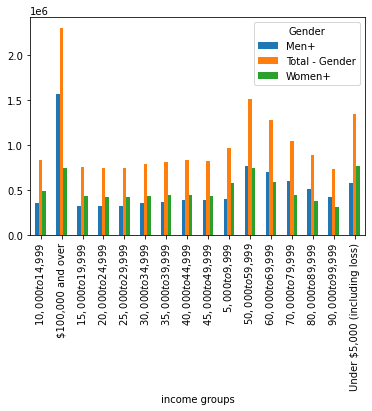

In [36]:
ca25_64.plot(kind='bar')

In [37]:
bc25_64 = bcGender2020.loc['25 to 64 years']

b = bc25_64.melt(value_vars=['Under $5,000 (including loss)','$5,000 to $9,999',
    '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999',
      '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999',
      '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', '$100,000 and over'], ignore_index=False)
bc25_64 = b.pivot_table(index='income groups',columns='Gender',values='value')


<AxesSubplot:xlabel='income groups'>

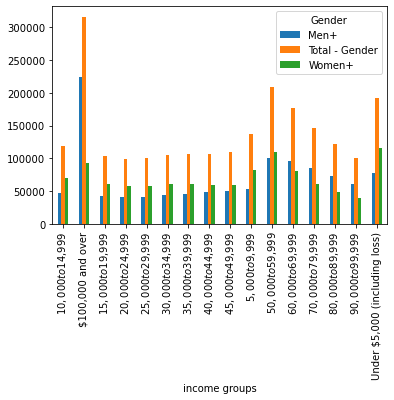

In [38]:
bc25_64.plot(kind='bar')

In [39]:
caGender2015 = caIncomeLevel.pivot_table(values='2015',index=['Age','Gender'],columns=['income groups'])
caGender2015 = caGender2015.reindex(Col_order,axis=1)

bcGender2015 = bcIncomeLevel.pivot_table(values='2015',index=['Age','Gender'],columns=['income groups'])
bcGender2015 = bcGender2015.reindex(Col_order,axis=1)

In [40]:
with pd.ExcelWriter('Employment income.xlsx') as writer:  
    caIncomeLevel2020.to_excel(writer, sheet_name='CAincome2020')
    bcIncomeLevel2020.to_excel(writer, sheet_name='BCincome2020')
    caIncomeLevel2015.to_excel(writer, sheet_name='CAincome2015')
    bcIncomeLevel2015.to_excel(writer, sheet_name='BCincome2015')
    caGender2020.to_excel(writer,sheet_name='CAgender2020')
    bcGender2020.to_excel(writer,sheet_name='BCgender2020')
    caGender2015.to_excel(writer,sheet_name='CAgender2015')
    bcGender2015.to_excel(writer,sheet_name='BCgender2015')
    

In [43]:
df.head()
df.to_excel('Census 2021.xlsx')